The purpose of this file is to perform experiments and keep notes. I prefer to do it this way to keep the other files cleaner and minimize necessary cleanup work later.

In [5]:
import pandas as pd
from pymongo import MongoClient

client = MongoClient()
db = client.osm
bergen = db.bergen

# df = pd.DataFrame(list(db.bergen.find()))

In [6]:
feature_list = list(db.bergen.find())

In [7]:
feature_list[1000:1001]

[{'_id': ObjectId('58b9c8cc3aa9a8938e3f6118'),
  'created': {'changeset': '34180559',
   'timestamp': '2015-09-22T11:02:06Z',
   'uid': '3252623',
   'user': 'Alex_K_B',
   'version': '8'},
  'id': '674462',
  'pos': [60.3924968, 5.3184896],
  'type': 'node'}]

In [9]:
df['created'][1:10]

NameError: name 'df' is not defined

In [10]:
df['address'][1:10]

NameError: name 'df' is not defined

In [12]:
from IPython.display import display
from IPython.display import HTML

#Getting count of documents with address field

address_query = { 'address' : {'$exists' : True } }
address_documents = db.bergen.find(address_query)
address_count = address_documents.count()

address_count

84625

In [13]:
address_documents = db.bergen.find(address_query)#, { 
#         'address.street': 1,'address.housenumber': 1,'address.postcode': 1,'address.city': 1
#     }
#                                   )

In [14]:
tmp_list = list(address_documents)

In [15]:
len(tmp_list)

84625

In [16]:
tmp_list[1]

{'_id': ObjectId('58b9c8d13aa9a8938e42e6b5'),
 'address': {'city': 'Ask',
  'housenumber': '14',
  'postcode': '5307',
  'street': 'Alléen'},
 'created': {'changeset': '26184573',
  'timestamp': '2014-10-19T03:27:36Z',
  'uid': '103253',
  'user': 'gormur',
  'version': '1'},
 'id': '3137785479',
 'pos': [60.4722042, 5.2151076],
 'type': 'node'}

In [17]:
from pprint import pprint

In [18]:


to_df = list()
# columns = ['street','housenumber','postcode','city']
count = 0 

for doc in tmp_list:
    record = { 'id': doc['id'], 'type': doc['type'] }
    
    for key,val in doc['address'].items():
        record[key] = val
        
    for key,val in doc['created'].items():
        record['created_' + key] = val
    
    if 'pos' in doc.keys():
        record['lat'] = doc['pos'][0]
        record['lon'] = doc['pos'][1]
    
    to_df.append(record)

In [19]:

tmp_set = set()

for doc in tmp_list:
    
    for k,v in doc.items():
        
        if k in ('address','created'):
            for key,val in v.items():
                tmp_set.add(k+'_'+key)
        else:
            tmp_set.add(k)
    

In [20]:
tmp_set

{'_id',
 'address_city',
 'address_country',
 'address_floor',
 'address_full',
 'address_housename',
 'address_housenumber',
 'address_postcode',
 'address_street',
 'building',
 'contact',
 'created_changeset',
 'created_timestamp',
 'created_uid',
 'created_user',
 'created_version',
 'description',
 'diet',
 'drink',
 'fuel',
 'health_facility',
 'health_specialty',
 'id',
 'internet_access',
 'isced',
 'medical_system',
 'name',
 'node_refs',
 'note',
 'operator',
 'payment',
 'pos',
 'recycling',
 'roof',
 'socket',
 'source',
 'toilets',
 'type',
 'website',
 'wheelchair'}

In [21]:
df_address = pd.DataFrame(to_df, columns = [
        'id','street','housenumber','city','postcode','created_uid','created_user',
        'created_version','created_timestamp','created_uid',
    'lat','lon','type'] )

In [22]:
df_address[1:10]

,id,street,housenumber,city,postcode,created_uid,created_user,created_version,created_timestamp,created_uid,lat,lon,type
1,3137785479,Alléen,14,Ask,5307,103253,gormur,1,2014-10-19T03:27:36Z,103253,60.472204,5.215108,node
2,3137785745,Alléen,15,Ask,5307,103253,gormur,1,2014-10-19T03:27:52Z,103253,60.472915,5.214824,node
3,3137785986,Alléen,16,Ask,5307,103253,gormur,1,2014-10-19T03:28:06Z,103253,60.472478,5.214310,node
4,3137786308,Alléen,17,Ask,5307,103253,gormur,1,2014-10-19T03:28:19Z,103253,60.472849,5.213429,node
5,3137783419,Askehavn,1,Ask,5307,103253,gormur,1,2014-10-19T03:26:16Z,103253,60.479432,5.214483,node
6,3137784381,Askehavn,11,Ask,5307,103253,gormur,1,2014-10-19T03:26:42Z,103253,60.479185,5.216010,node
7,3137785127,Askehavn,13,Ask,5307,103253,gormur,1,2014-10-19T03:27:18Z,103253,60.479242,5.216137,node
8,3137785747,Askehavn,15,Ask,5307,103253,gormur,1,2014-10-19T03:27:52Z,103253,60.479303,5.216265,node
9,3137786310,Askehavn,17,Ask,5307,103253,gormur,1,2014-10-19T03:28:19Z,103253,60.479506,5.216458,node


In [23]:
df_address.count()

id                   84625
street               84441
housenumber          84377
city                 84386
postcode             84390
created_uid          84625
created_user         84625
created_version      84625
created_timestamp    84625
created_uid          84625
lat                  83998
lon                  83998
type                 84625
dtype: int64

In [24]:
values = []
for cc in db.bergen.find():
  values.append(cc['created'])

print(pd.DataFrame(values)[1:10])

  changeset             timestamp     uid      user version
1   6007582  2010-10-10T22:30:31Z  114230  danerikk       2
2   6007582  2010-10-10T22:30:50Z  114230  danerikk       3
3   6007582  2010-10-10T22:29:55Z  114230  danerikk       3
4   6007582  2010-10-10T22:30:29Z  114230  danerikk       3
5   6007582  2010-10-10T22:29:54Z  114230  danerikk       2
6   6007582  2010-10-10T22:30:51Z  114230  danerikk       2
7   6007582  2010-10-10T22:30:31Z  114230  danerikk       2
8   6007582  2010-10-10T22:30:34Z  114230  danerikk       2
9   6007582  2010-10-10T22:29:56Z  114230  danerikk       2


In [25]:
import pandas as pd

postcodes_per_municipality = pd.read_csv('data/Postnummerregister_ansi.tsv', encoding='utf-8',delimiter='\t',header=0, names=[
        'postal_code','postal_place','muni_number','muni_name','category'],
            dtype = {'postal_code': str, 'municipality_number': str})

postcodes_per_municipality.head(5)

,postal_code,postal_place,muni_number,muni_name,category
0,0010,OSLO,301,OSLO,B
1,0015,OSLO,301,OSLO,B
2,0018,OSLO,301,OSLO,G
3,0021,OSLO,301,OSLO,P
4,0024,OSLO,301,OSLO,P


In [26]:
postcodes_per_municipality['postcodes_per_municipality'] = pd.to_numeric(postcodes_per_municipality['postal_code'])

In [27]:
import timeit
tmp_sl = postcodes_per_municipality['postal_code']


start = timeit.timeit()
for i in tmp_sl:
    if i == 5151:
        print('series for and if equal')

end = timeit.timeit()
print(end - start)

start = timeit.timeit()

if 5140 in tmp_sl.values:
        print('series if in')
    
end = timeit.timeit()
print(end - start)

tmp_sl = list(tmp_sl)

start = timeit.timeit()
for i in tmp_sl:
    if i == 5151:
        print('list for and if equal')

end = timeit.timeit()
print(end - start)

start = timeit.timeit()

if 5140 in tmp_sl:
        print('list if in')
    
end = timeit.timeit()
print(end - start)

# for func in f:
#     f = ['value = [val[5] for col,val in dictionary.items()]', 'value = s.loc[5]', 'value = df.iloc[5]']

#     print(min(timeit.Timer(func, setup).repeat(3, 100000)))

-0.0006307479998213239
0.0005075660010334104
-0.00040529199759475887
0.0012145240034442395


In [28]:
%alias_magic t timeit

import timeit
tmp_sl = postcodes_per_municipality['postal_code']


for i in tmp_sl:
    if i == 5151:
        print('series for and if equal')

%t -n1 if str(5146) in tmp_sl.values: print('series if in')

tmp_sl = list(tmp_sl)

for i in tmp_sl: 
    if i == 5151: 
        print('list for and if equal')

%t -n1 if str(5146) in tmp_sl: print('list if in')

# for func in f:
#     f = ['value = [val[5] for col,val in dictionary.items()]', 'value = s.loc[5]', 'value = df.iloc[5]']

#     print(min(timeit.Timer(func, setup).repeat(3, 100000)))

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.
series if in
series if in
series if in
1 loop, best of 3: 352 µs per loop
list if in
list if in
list if in
1 loop, best of 3: 193 µs per loop


In [29]:
tmp_sl = postcodes_per_municipality['postal_code']


tmp_sl.values

array(['0010', '0015', '0018', ..., '9982', '9990', '9991'], dtype=object)

In [30]:
#Removed cell February 9, 2017

# aggregated = bergen.aggregate([  
#         {'$match' :  { 'address': {'$exists' : True }, 'type': 'way' } },
#         { "$group" : { 
#                 "_id" : "$id","count" : { "$sum" : 1} } }
#     ])

# unique_street_count = 0

# for doc in aggregated:
# #     household_count += doc['count']
#     unique_street_count += 1

# print(unique_street_count)

#Removed cell, February 9, 2017

#EXPERIMENTAL, WILL BE REMOVED
streetnames_sorted_dict = dict(sorted(addresses_on_street.items(), key=lambda x: x[1], reverse=True))

for rec in streetnames_sorted_dict:
    if streetnames_sorted_dict[rec] == 184:
        print (rec,streetnames_sorted_dict[rec],type(rec))

#Removed cell February 9, 2017

#EXPERIMENTAL, WILL BE REMOVED
tmp_agg = db.bergen.aggregate([
         { "$group" : { "_id" : "$address.street",
                       "mset" : {
                         "$addToSet" : "$address.house_number"
                 } } },
         { "$unwind" : "$mset"},
         { "$group" : { "_id" : "$_id",
                       "count" : { "$sum" : 1} } },
         { "$sort" : { "count" : -1 } },
         { "$limit" : 10 } ] )

for doc in tmp_agg:
    print(doc)

#Removed cell February 20, 2017

#Converting list for dataframe usage
to_df = []

for dic in duplicate_addresses:
    dictionary = dict()
    
#     for key,val in dic.items():
#         dictionary[key] = val
        
#         if key == '_id':
    for key,val in dic['_id'].items():
        dictionary[key] = val
        
    dictionary['count'] = dic['count']
                
        
    to_df.append(dictionary)
    
to_df

#Removed from cleaning part February 20, 2017

            if count < 10:
                pass
            elif count == 10:
                pprint(data)
            else:
                break
        
        addr_count = 0
        for node in data:
            if (addr_count < 20) and 'address' in node.keys():-=0
                addr_count += 1
                pprint(node['address'])  

In [31]:
from collections import defaultdict

user_count_query = bergen.aggregate( [
   {
     '$group': {
        '_id' : { 'uid': '$created.uid', 'username': '$created.user' }
           }
        },
   {
     '$group': {
        '_id': 'null',
        'count': { '$sum': 1 }
     }
   }
] )

for doc in user_count_query:
    user_count = doc['count']

average_contributions = bergen.aggregate( [
   {
          '$group': 
            {
                '_id' : 
                { 'uid': '$created.uid', 'username': '$created.user' },
                'count': { '$sum': 1 } 
            } 
    },
    { 
            '$group': 
            {
                '_id': 'null',
                'avg': { '$avg': '$count' } 
            }
    }
] )

for doc in average_contributions:
    user_average = round(doc['avg'],2)
    
grouped_users = list(bergen.aggregate([  
        { 
            "$group" : 
            { 
                "_id" : { "uid": "$created.uid", "username": "$created.user" },
                "count" : { "$sum" : 1} 
            } 
        },
        { "$sort" : { "count" : 1 } }
        ]))

user_no = 0
halfway = round(user_count / 2)
mode_dict = defaultdict(int)

for doc in grouped_users:
        user_no += 1
        val = doc['count']
        if user_no == halfway:
            user_median = val
        
        mode_dict[val] += 1

user_mode = max(mode_dict.items(), key=lambda a: a[1])
mode_percentage = round((user_mode[1] / user_count) * 100,2)
            
print("Total user count:",user_count)
print("Average contributions per user:",user_average)
print("Median contributions per user:",user_median)
print("Mode of contribution count: {0} contributors ({1}%) submitted {2} edit.".format(
    user_mode[1],mode_percentage,user_mode[0] ) )



Total user count: 399
Average contributions per user: 1707.2
Median contributions per user: 11
Mode of contribution count: 76 contributors (19.05%) submitted 1 edit.


10000


(array([ 371.,    7.,    1.,    2.,    2.,    1.,    1.,    1.,    2.,
           1.,    0.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    1.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.40893000e+03,   2.81686000e+03,
          4.22479000e+03,   5.63272000e+03,   7.04065000e+03,
          8.44858000e+03,   9.85651000e+03,   1.12644400e+04,
          1.26723700e+04

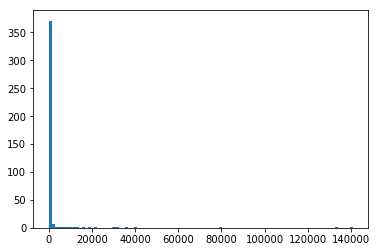

In [32]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline


mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

bah = np.array(list(doc['count'] for doc in grouped_users))

print(len(x))

plt.hist(bah,bins=100)


In [33]:
s_mode_dict = pd.Series(mode_dict)

In [34]:
df_mode_dict = pd.DataFrame(s_mode_dict,columns=['count'])

In [35]:
df_mode_dict['contributions'] = df_mode_dict.index

In [36]:
df_mode_dict = df_mode_dict[['contributions','count']]

In [37]:
[2,3,4,list(range(1,10,2))]

[2, 3, 4, [1, 3, 5, 7, 9]]

In [38]:
list(range(1,10,2)) + list(range(1,4))

[1, 3, 5, 7, 9, 1, 2, 3]

from collections import OrderedDict

bracket_names = OrderedDict()
for item in bins:
    if item != bins[-1]:
        if item < 10:
            bracket_names[str(item)] = item  
        else:
            next = bins[bins.index(item) + 1]
            bracket_names['{0} to {1}'.format(item,next)] = item
            
bracket_names

In [41]:
bracket_names.keys()

odict_keys([])

In [42]:
# for key,val in (bracket_names.keys(),bracket_names.values()):
#     print(key,val)

len(bracket_names.values())

0

print(bins)
print(list(bracket_names.values()))

tmp_dict = dict()

for item in bins:
    bin_index = bins.index(item)
        
    try:
        tmp_dict[bracket_names[bin_index]] = item
    except IndexError:
        print(item)
    
tmp_dict

In [45]:
df_mode_dict.dtypes

contributions    int64
count            int64
dtype: object

In [46]:
str(11000)[:-3] + 'K'

'11K'

In [47]:
#Creating age brackets and removing records with missing ageb

bins = list(range(0,10,1) ) + list(range(10,100,10) ) + \
list(range(100,1000,100) ) + list(range(1000,10000,5000) ) + \
list(range(10000,50000,20000) ) + list(range(50000,151000,50000) )

bracket_names = list()
for item in bins:
    if item != bins[-1]:
        if item < 10:
            bracket_names.append(str(item+1)) 
        else:
            start = item + 1
            next = bins[bins.index(item) + 1]
            if start > 1000:
                start = str(start)[:-3] + 'K'
                next = str(next)[:-3] + 'K'
            bracket_names.append('{0} to {1}'.format(start,next))
        
categories = pd.Series(pd.cut(df_mode_dict['contributions'], bins ,
                              labels=bracket_names, include_lowest=True ) )

df_mode_dict['bracket'] = categories
#pd.cut does not work perfectly for what I want, so I have to adjust some brackets
# df_mode_dict['bracket'][df_mode_dict['contributions'] < 11] = df_mode_dict['contributions']

display(df_mode_dict.head(30))
display(df_mode_dict.tail(4))

# print("Number of passengers used for age analysis:", len(age_data))

,contributions,count,bracket
1,1,76,1
2,2,30,2
3,3,23,3
4,4,15,4
5,5,14,5
6,6,9,6
7,7,5,7
8,8,10,8
9,9,11,9
10,10,3,10


,contributions,count,bracket
39789,39789,1,30K to 50K
80243,80243,1,50K to 100K
133655,133655,1,100K to 150K
140794,140794,1,100K to 150K


In [48]:
for_plot = df_mode_dict.groupby('bracket')['count'].agg('sum')

In [49]:
for_plot

bracket
1               76
2               30
3               23
4               15
5               14
6                9
7                5
8               10
9               11
10               3
11 to 20        39
21 to 30        23
31 to 40        14
41 to 50        11
51 to 60        10
61 to 70         9
71 to 80         7
81 to 90         7
91 to 100        1
101 to 200      19
201 to 300       8
301 to 400       8
401 to 500       2
501 to 600       1
601 to 700       3
701 to 800       1
801 to 900       4
901 to 1000      1
1K to 6K        18
6K to 10K        3
10K to 30K       8
30K to 50K       3
50K to 100K      1
100K to 150K     2
Name: count, dtype: int64

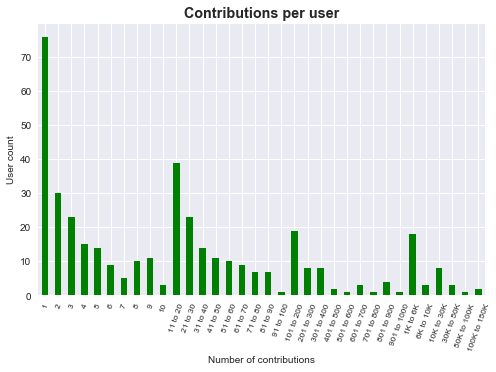

In [50]:
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#all passengers plot
rects = for_plot.plot(kind='bar',ax=ax,color='g')
ax.set_title('Contributions per user',fontsize='large',fontweight='bold')
ax.set_xlabel('Number of contributions',fontsize='small')
ax.set_ylabel('User count',fontsize='small')
ax.set_xticklabels(for_plot.index.values,rotation='70',fontsize='x-small')

plt.show()

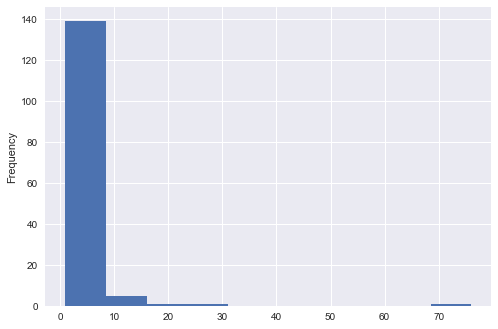

In [51]:
s_mode_dict.plot.hist(bins=10)

In [52]:
bah_list = list(bah)

bah_list.sort()

bah_list[-1]

140794

(array([ 196.,   39.,   23., ...,    0.,    0.,    0.]),
 array([     1,     11,     21, ..., 140771, 140781, 140791]),
 <a list of 14079 Patch objects>)

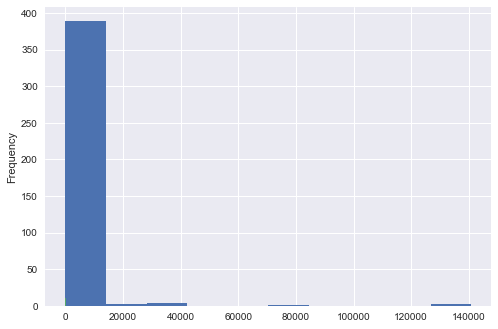

In [54]:
s_grouped_users = pd.Series(list(doc['count'] for doc in grouped_users))

s_grouped_users.plot(kind='hist')

data = s_grouped_users

plt.hist(data, bins=range(min(data), max(data) + 5, 10))

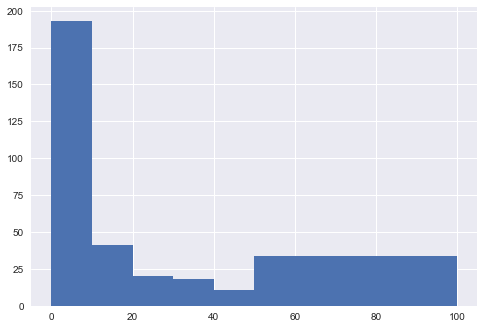

In [55]:
s_grouped_users.hist(bins=[0, 10, 20, 30, 40, 50, 100])

In [56]:
df_mode_dict.iloc[50:]

,contributions,count,bracket
62,62,1,61 to 70
63,63,2,61 to 70
64,64,2,61 to 70
68,68,2,61 to 70
69,69,1,61 to 70
70,70,1,61 to 70
71,71,1,71 to 80
77,77,1,71 to 80
78,78,1,71 to 80
79,79,3,71 to 80


In [57]:
from scipy import stats

stats.describe(bah)

DescribeResult(nobs=399, minmax=(1, 140794), mean=1707.1979949874687, variance=125050201.11899096, skewness=10.144399415922146, kurtosis=113.09548750905759)

#### Misspelled streets

In [58]:
#Getting counts for streetnames and addresses

aggregated = bergen.aggregate([  
        {'$match' : {'address': {'$exists' : True } } },
        { "$group" : { 
                "_id" : "$address.street","count" : { "$sum" : 1} } }
    ])

household_count = 0
unique_street_count = 0
addresses_on_street = {}

for doc in aggregated:
    household_count += doc['count']
    unique_street_count += 1
    
    addresses_on_street[doc['_id']] = doc['count']

print("total addresses in Bergen:", household_count)
print("number of streetnames:", unique_street_count)

total addresses in Bergen: 84625
number of streetnames: 2231


In [59]:
#Taking a look at the streets with the most addresses

from operator import itemgetter

streetnames_sorted_dict = dict(sorted(addresses_on_street.items(), key=lambda x: x[1], reverse=True)[:10])
streetnames_sorted_list = sorted(addresses_on_street.items(), key=lambda x: x[1], reverse=True)


display(HTML("<b>Streets with most addresses on them:</b>"))

for street,count in streetnames_sorted_list[0:10]:
    print(street,count)

Myrdalskogen 442
Askvegen 397
Søråshøgda 377
Kringlebotn 304
Flaktveitvegen 293
Stongafjellsvegen 289
Hjellestadvegen 277
Hetlevikåsen 276
Langarinden 273
Nipedalen 250


In [63]:
#Checking for potential duplicate data due to misspelled street names

import difflib
from fuzzywuzzy import fuzz

def fuzzy_streets(ratio,house_count):
    
    fuzzy_matches = list()
    compare_count = 0
    
    for k1 in streetnames_sorted_list:

        if k1[0] is None:
            print("Addresses without street name:",k1[1])

        #Only comparing street names with less addresses than house_count
        elif k1[1] <= house_count:
            
            compare_count += 1

            for k2 in streetnames_sorted_list:

                if k2[0] is None:
                    pass

                elif k2[0] == k1[0]:
                    pass

                else:                    
                    
                    fuzz_ratio = fuzz.ratio(k1[0],k2[0])
                    
                    if fuzz_ratio >= ratio:
                        fuzzy_matches.append({k1: k2,"fuzz ratio": fuzz_ratio})

    print("Number of street names compared: {0} of {1}".format(compare_count,len(streetnames_sorted_list)))
    
    return fuzzy_matches

In [64]:
potential_misspellings = fuzzy_streets(92,10)

Addresses without street name: 184
Number of street names compared: 526 of 2231


In [65]:
#Printing out the potential misspellings

df_potential_misspellings = pd.DataFrame(columns = [
        'high_spelling','high_count','low_spelling','low_count','fuzz_ratio'])

#Adding index to make it easier to sort out the items I need to investigate further
count = 0

for spellings in potential_misspellings:
    count += 1
    df_potential_misspellings.loc[count] = None
    for key, val in spellings.items():
        if type(key) == tuple:
            if key[1] > val[1]:
                df_potential_misspellings.loc[count]['high_spelling'] = key[0]
                df_potential_misspellings.loc[count]['low_spelling'] = val[0]
                df_potential_misspellings.loc[count]['high_count'] = key[1]
                df_potential_misspellings.loc[count]['low_count'] = val[1]

            else:
                df_potential_misspellings.loc[count]['high_spelling'] = val[0]
                df_potential_misspellings.loc[count]['low_spelling'] = key[0]
                df_potential_misspellings.loc[count]['high_count'] = val[1]
                df_potential_misspellings.loc[count]['low_count'] = key[1]
        else:
            df_potential_misspellings.loc[count]['fuzz_ratio'] = val

df_potential_misspellings.drop_duplicates().sort_values('high_spelling',ascending=True)

,high_spelling,high_count,low_spelling,low_count,fuzz_ratio
7,Austrevågen,21,Austevågen,5,95
18,Bønesskogen,222,Børnesskogen,1,96
13,C. Sundts gate,53,C.Sundtsgate,2,92
1,Dreggsallmenningen,10,Dreggsallmenning,1,94
19,Espelandsvegen,76,Espelandsveien,1,93
5,Flyplassvegen,27,Flyplassveien,7,92
6,Haakon Sheteligs plass,6,Haakon Shetelings plass,2,98
17,Hallvardsvegen,14,Halvardsvegen,1,96
2,Herman Foss’ gate,9,Herman Foss' gate,1,94
22,Lars Hilles gate,26,Lars Hillesgate,1,97


Contributors

In [ ]:
#Getting counts for streetnames and addresses

user_count = bergen.aggregate([  
        { "$group" : { 
                "_id" : { "uid": "$created.uid", "mset": {"username": "$created.user" } } } },
        { "$unwind" : "$mset"},
        { "$group" : { "_id" : "$uid",
                      "count" : { "$sum" : 1} } }        
    ])

# household_count = 0
# unique_street_count = 0
# addresses_on_street = {}

# for doc in aggregated:
#     household_count += doc['count']
#     unique_street_count += 1
    
#     addresses_on_street[doc['_id']] = doc['count']

# print("total addresses in Bergen:", household_count)
# print("number of streetnames:", unique_street_count)

for doc in user_count:
    print(doc)

### Plan going forward:

- Export list of duplicate addresses in two formats: full data in json/osm, addresses in 2 or 3 columns (3 with postcode)
- Wrangling file: add postcode cleaning